# Practical Lab 7 - Clustering

Note: This practical session is based on chapter 12, section 12.5.3.

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import pandas as pd
import seaborn as sns

## Part 1 - Hierarchical

Load the housing.csv. We gonna use this dataset today.

In [3]:
#more info:
#https://www.kaggle.com/datasets/camnugent/california-housing-prices/

home_data = pd.read_csv('housing.csv')
home_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1 - Create a scatterplot for X = longitude and Y = latitude.

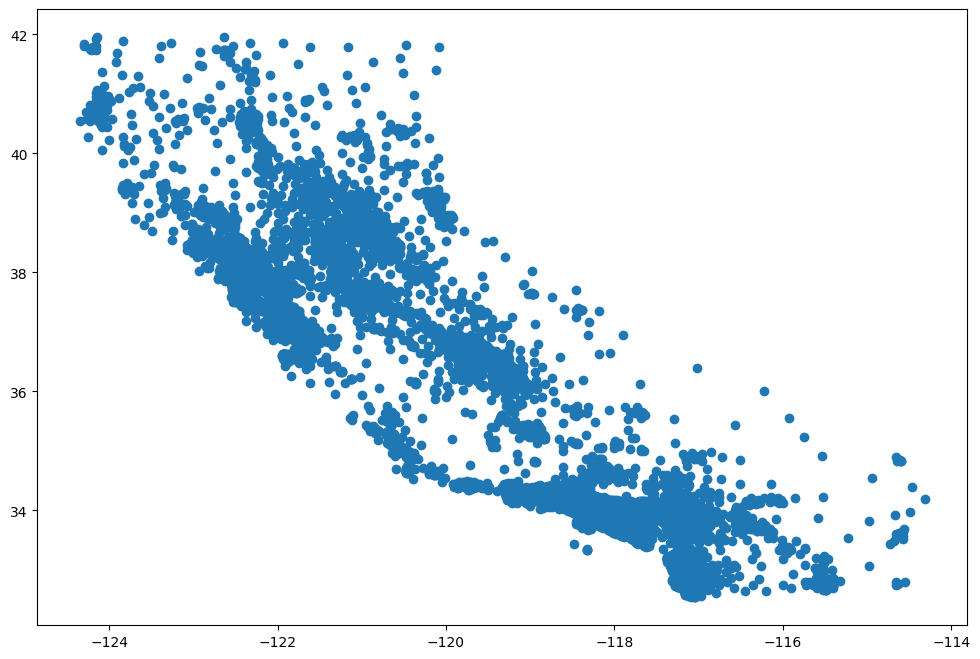

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(home_data['longitude'], home_data['latitude'])

2 - What type of data do we have? Where are the houses located? Try observing the data projected on the map of California.

In [5]:
#os dados analisados são edificaçoes localizadas na California. Cada ponto indica uma latitude e uma longitude.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/22/California_economic_regions_map_%28labeled_and_colored%29.svg" alt="drawing" width="400"/>

3 - Would we be able to locate demographically dense regions using logistic regression and just latitude and longitude data?

In [6]:
#a pergunta desse exercicio é se com modelos de cluster será possivel localizar as grandes cidades a partir da densidade demográfica ou maior presença de casas juntas?

4 - If we want to locate the most populated regions using residential data, one of the solutions would be to use hierarchical clusters. The first step is create a distance matrix. Create the distance matrix using `scipy.cluster.hierarchy`.

In [7]:
#criando uma linkage matrix com metrica de distancia euclidiana e metodo single
Z = shc.linkage(home_data[['longitude','latitude']],
                method='single',
                metric='euclidean')

5 - Which method and metric did you use?

In [ ]:
#usa-se a metrica euclidiana que basicamente é a distancia entre os dois pontos no grafico
#usa-se o metodo single, distancia entre os dois pontos mais proximos entre 2 clusters.

6 - Let's try different methods and their graphical representations. Create linkage matrices for hierarchical clustering and plot them. Make three settings for the methods: single, complete and average. For your plots, set the number of clusters equal to three.

In [9]:
#criando uma linkage matrix com metrica de distancia euclidiana e metodo single
Z = shc.linkage(home_data[['longitude','latitude']],
                method='single',
                metric='euclidean')


#criar os labels a partir da linkage matrix criada
#para o criterio maxclust t terá o valor 3 que indicao numero maximo de clusters
#t também pode ser o threshold aplicado a matrix
labels = shc.fcluster(
    Z, 3,
    criterion='maxclust'
    )

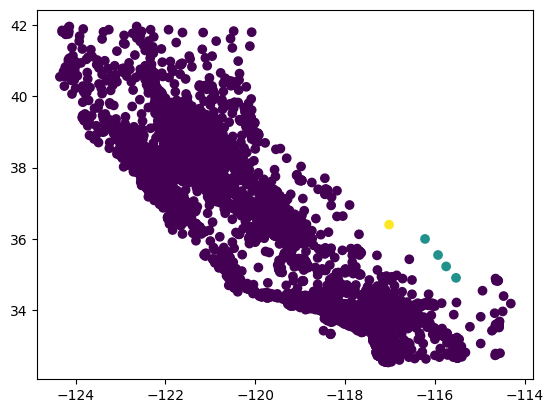

In [10]:
plt.scatter(home_data['longitude'], home_data['latitude'], c=labels)

In [11]:
#criando uma linkage matrix com metrica de distancia euclidiana e metodo complete
Z = shc.linkage(home_data[['longitude','latitude']],
                method='complete',
                metric='euclidean')

#criar os labels a partir da linkage matrix criada
labels = shc.fcluster(
    Z, 3,
    criterion='maxclust'
    )

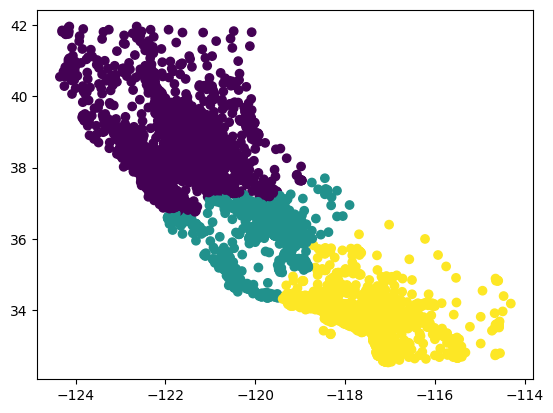

In [12]:
plt.scatter(home_data['longitude'], home_data['latitude'], c=labels)

In [13]:
#criando uma linkage matrix com metrica de distancia euclidiana e metodo average
Z = shc.linkage(home_data[['longitude','latitude']],
                method='average',
                metric='euclidean')

#criar os labels a partir da linkage matrix criada
labels = shc.fcluster(
    Z, 3,
    criterion='maxclust'
    )

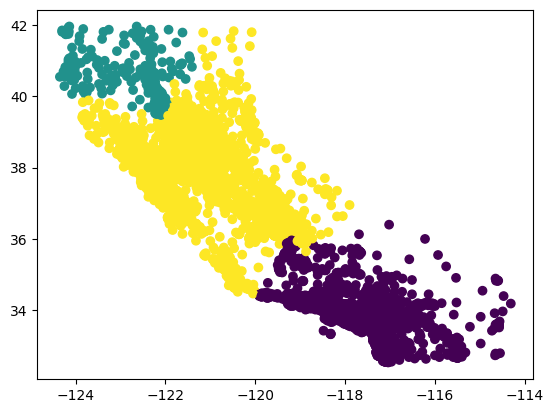

In [14]:
plt.scatter(home_data['longitude'], home_data['latitude'], c=labels)

7 - Analyze the plots above to observe how the points were distributed. Don't take the colors as a reference, they only help you differentiate the clusters in the same graph.

8 - For the plots above we configured our model for 3 clusters. But how do we know the ideal number of clusters to fit the data?

In [ ]:
#determinar o numero ideal de clusters passa por uma analise profunda dos dados.
#para metodos hierárquicos podemos usar o dendrograma como critério para definir a quantidade de clusters.

9 - One of the solutions for this is the use of the Dendrogram. Plot the dendrogram for a linkage matrix with `metric='euclidean'` and `method='average'`.

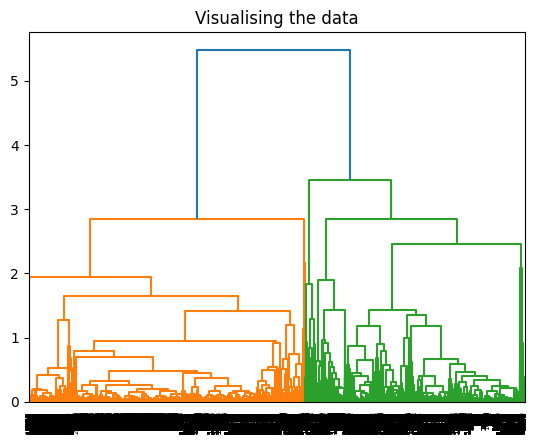

In [15]:
#criando uma linkage matrix com método average
Z = shc.linkage(home_data[['longitude','latitude']],
                method='average',
                metric='euclidean')

#criaçao do dendrograma a partir da matriz linkage Z
plt.title('Visualising the data')
Dendrogram = shc.dendrogram(Z)


10 - Analyzing the dendrogram above, how many clusters do you think we have?

In [ ]:
#os clusters sao percebidos pelas cores no grafico. Para esse exemplo acima o threshold está em algo entre 4-5
#Com o threshold em 5 (linha constante) analisa-se quantas linhas verticais temos abaixo dela e definimos quantos clusters

11 - We can modify the dendrogram to visually displays more color groups(clusters) by manipulating `color_threshold`. Adjust the `color_threshold` to 1.5 and regenerate the dendrogram again.

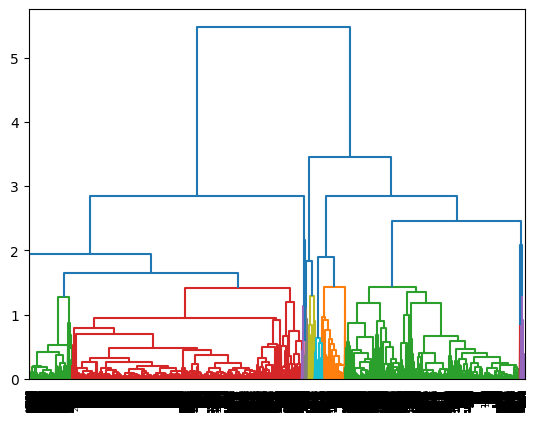

In [ ]:
#é possivel modificar o threshold a partir da color_threshold
#observa-se que agora a linha em 1.5 e portanto a quantidade de clusters aumenta a partir de que se reduz threshold
shc.dendrogram(Z, color_threshold=1.5)
plt.show()

12 - Create labels for the cluster configuration proposed above and plot them on the graph.

In [ ]:
# Novos labels a partir dos 9 clusters observados acima
labels = shc.fcluster(
    Z, 9,
    criterion='maxclust'
    )

In [ ]:
#criar um novo dataframe contendo latitude, longitude e os labels
tips = home_data[['longitude','latitude']]
tips['labels']= labels
tips.head()

<ipython-input-19-322761c07645>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tips['labels']= labels


,longitude,latitude,labels
0,-122.23,37.88,7
1,-122.22,37.86,7
2,-122.24,37.85,7
3,-122.25,37.85,7
4,-122.25,37.85,7


<ipython-input-20-a7674a26ba7e>:6: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  g = sns.scatterplot(data=tips, x="longitude", y="latitude", hue="labels",palette = sns.color_palette("tab10"))


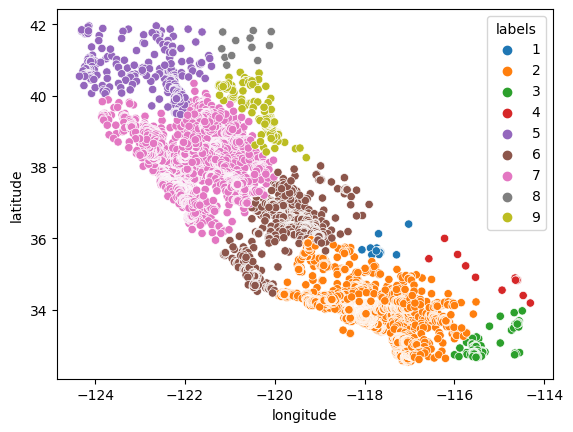

In [ ]:
#criar um plo para o dataframe e os 9 clusters
#usar uma paleta de cor de 10 cores para garantir cor diferente para cada cluster
sns.color_palette("tab10")

#plot usando o seaborn
g = sns.scatterplot(data=tips, x="longitude", y="latitude", hue="labels",palette = sns.color_palette("tab10"))

# Extra - Kmeans

In [ ]:
#gerando o dataframe X
X = home_data[['longitude','latitude']]

In [ ]:
#criando modelo kmenas para 9 clusters
#k=9
#kmeans tem como restricao indicar a quantidade de cluster logo na criação do modelo
kmeans = KMeans(n_clusters=9)

In [ ]:
#inserir nova coluna no dataframe X com os labels gerados pelo Kmeans
X["Cluster"] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-29-084559d1dfc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"] = kmeans.fit_predict(X)


<ipython-input-30-58e9fd4a9491>:3: UserWarning: The palette list has more values (10) than needed (9), which may not be intended.
  g = sns.scatterplot(data=X, x="longitude", y="latitude", hue="Cluster",palette = sns.color_palette("tab10"))


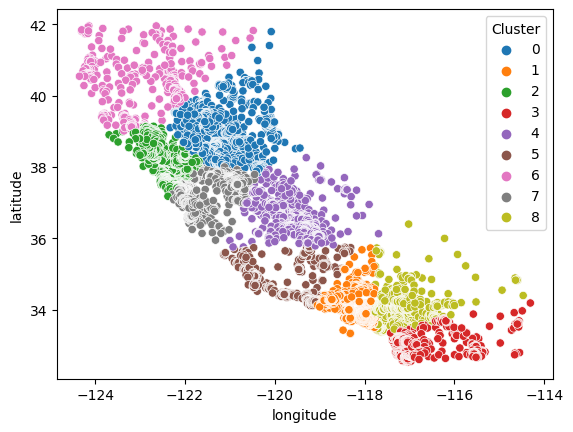

In [ ]:
#criar scatterplot sobre o modelo Kmeans
sns.color_palette("tab10")
g = sns.scatterplot(data=X, x="longitude", y="latitude", hue="Cluster",palette = sns.color_palette("tab10"))